In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import Functions.Model as fmod
import Functions.General as fgen
import Functions.Preparation as fprep
import config_main as cm
import Configuration.config_model as cmod
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')


In [134]:
# Loading train and correct types
train = pd.read_csv(cm.train)
# convert just columns "a" and "b"
train = fprep.convert_columns_with_function(train, 'object', 'PassengerId')
train.dtypes

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [135]:
# Quick data check
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891.0,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,891.0,NaN,NaN,"Jussila, Miss. Mari Aina",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,1.0,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Length of dataframe: 891
Describing: Survived



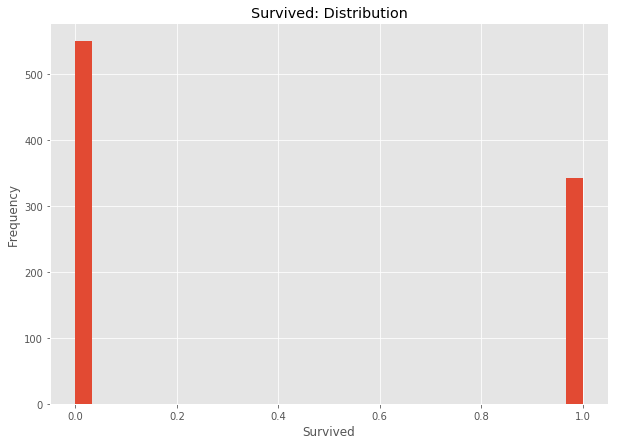

Quantiles:
 0.00    0.0
0.25    0.0
0.50    0.0
0.75    1.0
1.00    1.0
Name: Survived, dtype: float64
____________________________________________________________________________________________________

Describing: Pclass



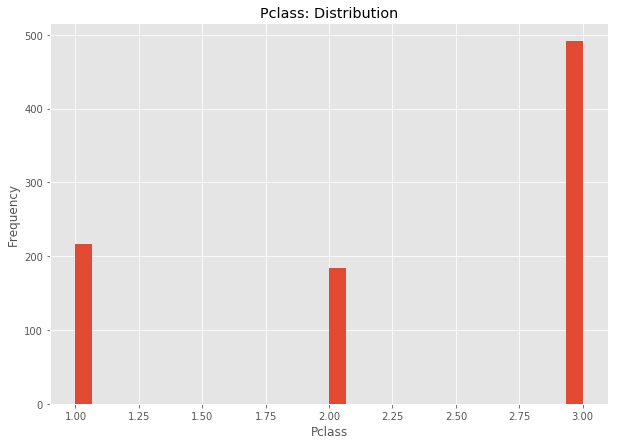

Quantiles:
 0.00    1.0
0.25    2.0
0.50    3.0
0.75    3.0
1.00    3.0
Name: Pclass, dtype: float64
____________________________________________________________________________________________________

Describing: Age


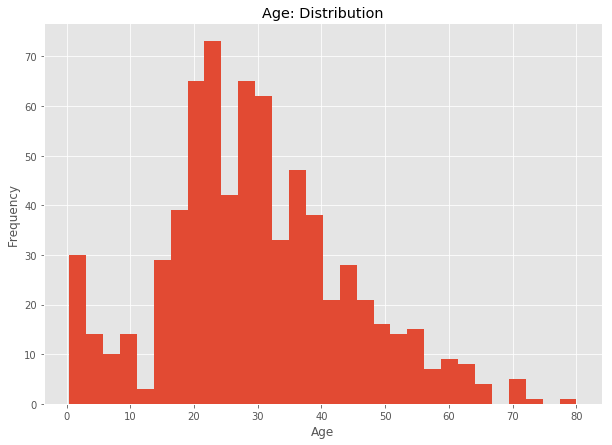

Quantiles:
 0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: Age, dtype: float64
____________________________________________________________________________________________________

Describing: SibSp



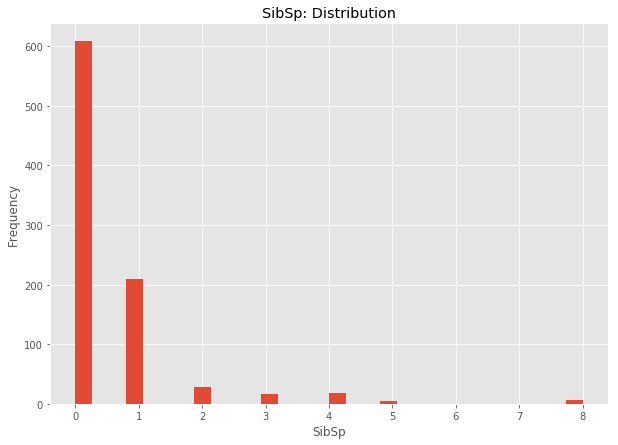

Quantiles:
 0.00    0.0
0.25    0.0
0.50    0.0
0.75    1.0
1.00    8.0
Name: SibSp, dtype: float64
____________________________________________________________________________________________________

Describing: Parch



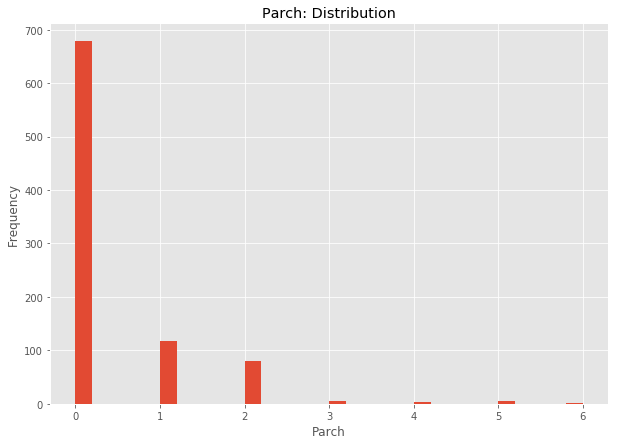

Quantiles:
 0.00    0.0
0.25    0.0
0.50    0.0
0.75    0.0
1.00    6.0
Name: Parch, dtype: float64
____________________________________________________________________________________________________

Describing: Fare



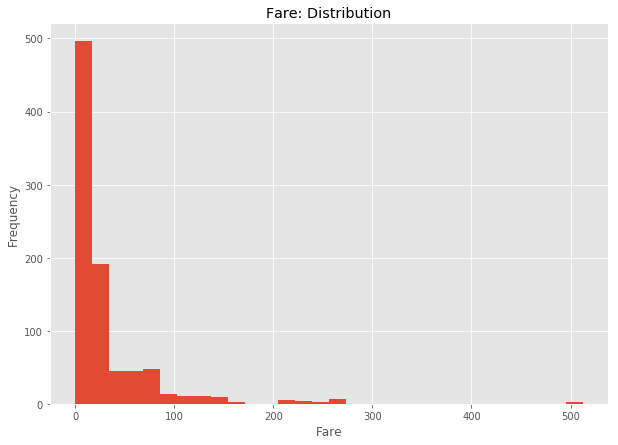

Quantiles:
 0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64
____________________________________________________________________________________________________

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [138]:
fprep.describe_features(train, timeline=False)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Filtering dataframe. Length of dataframe before filtering: 891
Filtering: Parch <5

Quantiles BEFORE filtering:
 0.00    0.0
0.25    0.0
0.50    0.0
0.75    0.0
1.00    6.0
Name: Parch, dtype: float64


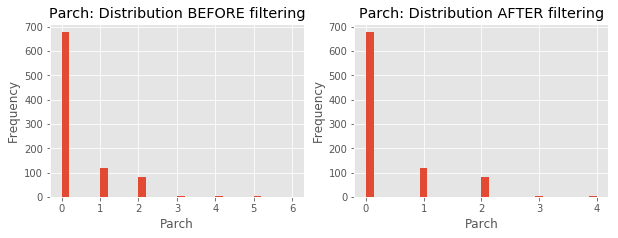

Quantiles AFTER filtering:
 0.00    0.0
0.25    0.0
0.50    0.0
0.75    0.0
1.00    4.0
Name: Parch, dtype: float64
Length of dataframe after filtering: 885
____________________________________________________________________________________________________

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


885

In [139]:
train_filtered = fprep.filter_variables(df=train, Parch='<5')
train_filtered = train_filtered.dropna(subset=['PassengerId'])
len(train_filtered)

In [140]:
train_imputed = train_filtered
train_imputed['Age'] = train_filtered.Age.fillna(train_filtered.Age.mean())
train_imputed['Embarked'] = train_filtered.Embarked.fillna('OTHER')

In [141]:
train_encoded = train_imputed
from sklearn.preprocessing import LabelEncoder

le_embarked = LabelEncoder()
le_sex = LabelEncoder()
train_encoded['Embarked'] = le_embarked.fit_transform(x_train.Embarked)
train_encoded['Sex'] = le_sex.fit_transform(x_train.Sex)

In [173]:
from sklearn.model_selection import train_test_split

x = train_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
y = train_encoded.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [180]:
gs = cmod.grid_search
gs.fit(x_train, y_train)
gs_results = pd.DataFrame(gs.cv_results_)
gs_results['Version'] = cm.currentVersion
gs_results.to_csv(cm.gridsearch_log, mode='a')

In [179]:
gs_results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_clf', 'param_clf__max_depth',
       'param_clf__max_features', 'param_clf__min_samples_leaf',
       'param_clf__n_estimators', 'param_clf__random_state',
       'param_clf__strategy', 'params', 'rank_test_score', 'split0_test_score',
       'split0_train_score', 'split1_test_score', 'split1_train_score',
       'split2_test_score', 'split2_train_score', 'split3_test_score',
       'split3_train_score', 'split4_test_score', 'split4_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [178]:
perfect_model = gs.best_estimator_


Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=[1, 6], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=No...stimators=500, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False))])